# Classify

In [ ]:
#| default_exp tfreq

In [ ]:
#| hide

import plotly.io as pio
import numpy as np
from scipy.spatial.distance import euclidean

In [ ]:
#| hide
pio.renderers.default = "png"

In [ ]:
#| hide
from fhemb.config.settings import setup_logging, THERMO_SR
from fhemb.utils.cutils import depict_clusters, dtw_clustering, prepare_data, split_scale_data, depict_DTW, plot_dm_heatmap, plot_dm_dendrogram
from fhemb.piece import Piece
from fhemb.utils.factories import wfactory, wfactories, pca_factory

DEBUG:fhemb.config.settings:Loading environment from /Users/radned/.config/fhemb/.env.paths
DEBUG:fhemb.config.settings:Loading environment from /Users/radned/.config/fhemb/.env.db
/Users/radned/.pyenv/versions/p311.fhemb/lib/python3.11/site-packages/threadpoolctl.py:1226: RuntimeWarning:


Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md


 [DEBUG] cutils.<module>: ROOT: /Users/radned/Projects/ttsembedding/


In [ ]:
#| hide

import logging

In [ ]:
#| hide 

setup_logging()
logger = logging.getLogger('classify')

In [ ]:
#| hide

FFTRIO_DIRNAME = 'fftrio0_fftrio1/'
FFTRIO0011_DIRNAME = 'fftrio00_fftrio11/'
NGF0_FFTRIO1_DIRNAME = 'ngf0_fftrio1/'
NGF1_FFTRIO1_DIRNAME = 'ngf1_fftrio1/'
NGF_DIRNAME = 'ngf0_ngf1/'

In [ ]:
#| hide

overture_interval = 6*60, 7*60
nottegiornofaticar_interval = 7*60 + 34.4, 7*60+54.4
murder_interval = 9*60+40, 10*60+40
ftrio_interval = 10*60+24.8, 11*60+38.8   # complete trio interval
fftrio_interval = 10*60+22.4, 11*60+42.4  # extended trio interval
death_interval = 10*60+40, 11*60+40

In [ ]:
#| hide
overture_frames = tuple(map(lambda x: round((x-54.4)*THERMO_SR), overture_interval))
nottegiornofaticar_frames = tuple(map(lambda x: round((x-54.4)*THERMO_SR), nottegiornofaticar_interval))    
murder_frames = tuple(map(lambda x: round((x-54.4)*THERMO_SR), murder_interval))
ftrio_frames = tuple(map(lambda x: round((x-54.4)*THERMO_SR), ftrio_interval))
fftrio_frames = tuple(map(lambda x: round((x-54.4)*THERMO_SR), fftrio_interval))
death_frames= tuple(map(lambda x: round((x-54.4)*THERMO_SR), death_interval))

In [ ]:
#| hide

nottegiornofaticar_segment0 = (10000, 10250)
nottegiornofaticar_segment1 = (10250, 10500)
fftrio_segment0 = (14200, 14450)
fftrio_segment1 = (14950, 15200)
fftrio_segment2 = (15950, 16200)
fftrio_segment00 = (14200, 14700)
fftrio_segment11 = (14950, 15450)
fftrio_segment22 = (15700, 16200)

In [ ]:
#| eval: false

nottegiornofaticar0 = Piece(
    time_interval=nottegiornofaticar_segment0, 
    title="Don Giovanni", subjs=(40,76))

 [DEBUG] mixins.wrapper: wrapper of process_subjects called with subjs=(40, 76), args=() and kwargs={'time_interval': (10000, 10250), 'title': 'Don Giovanni'}
 [DEBUG] mixins.wrapper: Calling: get_piece_attribute_values with title=Don Giovanni and atributes=['number_of_subjects']
 [DEBUG] mixins.wrapper: to get subjects_int from 'number_of_subjects' record in performance_library
 [DEBUG] mixins.wrapper: Calling: __init__ with subjs=[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76] and args=() and kwargs={'time_interval': (10000, 10250), 'title': 'Don Giovanni'}
 [DEBUG] piece.__init__: Processed subjects: [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]
 [DEBUG] piece.__init__: Compact numeric subjects: [(40, 76)]


In [ ]:
#| eval: false

nottegiornofaticar1 = Piece(
    time_interval=nottegiornofaticar_segment1, 
    title="Don Giovanni", subjs=(40,76))

 [DEBUG] mixins.wrapper: wrapper of process_subjects called with subjs=(40, 76), args=() and kwargs={'time_interval': (10250, 10500), 'title': 'Don Giovanni'}
 [DEBUG] mixins.wrapper: Calling: get_piece_attribute_values with title=Don Giovanni and atributes=['number_of_subjects']
 [DEBUG] mixins.wrapper: to get subjects_int from 'number_of_subjects' record in performance_library
 [DEBUG] mixins.wrapper: Calling: __init__ with subjs=[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76] and args=() and kwargs={'time_interval': (10250, 10500), 'title': 'Don Giovanni'}
 [DEBUG] piece.__init__: Processed subjects: [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]
 [DEBUG] piece.__init__: Compact numeric subjects: [(40, 76)]


In [ ]:
#| eval: true

fftrio0 = Piece(
    time_interval=fftrio_segment0, 
    title="Don Giovanni", subjs=(40,76))

 [DEBUG] mixins.wrapper: wrapper of process_subjects called with subjs=(40, 76), args=() and kwargs={'time_interval': (14200, 14450), 'title': 'Don Giovanni'}
 [DEBUG] mixins.wrapper: Calling: get_piece_attribute_values with title=Don Giovanni and atributes=['number_of_subjects']
 [DEBUG] mixins.wrapper: to get subjects_int from 'number_of_subjects' record in performance_library
 [DEBUG] mixins.wrapper: Calling: __init__ with subjs=[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76] and args=() and kwargs={'time_interval': (14200, 14450), 'title': 'Don Giovanni'}
 [DEBUG] piece.__init__: Processed subjects: [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]
 [DEBUG] piece.__init__: Compact numeric subjects: [(40, 76)]


In [ ]:
#| eval: false
fftrio00 = Piece(
    time_interval=fftrio_segment00, 
    title="Don Giovanni", subjs=(40,76))

 [DEBUG] mixins.wrapper: wrapper of process_subjects called with subjs=(40, 76), args=() and kwargs={'time_interval': (14200, 14700), 'title': 'Don Giovanni'}
 [DEBUG] mixins.wrapper: Calling: get_piece_attribute_values with title=Don Giovanni and atributes=['number_of_subjects']
 [DEBUG] mixins.wrapper: to get subjects_int from 'number_of_subjects' record in performance_library
 [DEBUG] mixins.wrapper: Calling: __init__ with subjs=[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76] and args=() and kwargs={'time_interval': (14200, 14700), 'title': 'Don Giovanni'}
 [DEBUG] piece.__init__: Processed subjects: [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]
 [DEBUG] piece.__init__: Compact numeric subjects: [(40, 76)]


In [ ]:
#| eval: true

fftrio1 = Piece(
    time_interval=fftrio_segment1,
    title="Don Giovanni", subjs=(40,76))

 [DEBUG] mixins.wrapper: wrapper of process_subjects called with subjs=(40, 76), args=() and kwargs={'time_interval': (14950, 15200), 'title': 'Don Giovanni'}
 [DEBUG] mixins.wrapper: Calling: get_piece_attribute_values with title=Don Giovanni and atributes=['number_of_subjects']
 [DEBUG] mixins.wrapper: to get subjects_int from 'number_of_subjects' record in performance_library
 [DEBUG] mixins.wrapper: Calling: __init__ with subjs=[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76] and args=() and kwargs={'time_interval': (14950, 15200), 'title': 'Don Giovanni'}
 [DEBUG] piece.__init__: Processed subjects: [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]
 [DEBUG] piece.__init__: Compact numeric subjects: [(40, 76)]


In [ ]:
#| eval: false

fftrio11 = Piece(
    time_interval=fftrio_segment11,
    title="Don Giovanni", subjs=(40,76))

 [DEBUG] mixins.wrapper: wrapper of process_subjects called with subjs=(40, 76), args=() and kwargs={'time_interval': (14950, 15450), 'title': 'Don Giovanni'}
 [DEBUG] mixins.wrapper: Calling: get_piece_attribute_values with title=Don Giovanni and atributes=['number_of_subjects']
 [DEBUG] mixins.wrapper: to get subjects_int from 'number_of_subjects' record in performance_library
 [DEBUG] mixins.wrapper: Calling: __init__ with subjs=[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76] and args=() and kwargs={'time_interval': (14950, 15450), 'title': 'Don Giovanni'}
 [DEBUG] piece.__init__: Processed subjects: [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]
 [DEBUG] piece.__init__: Compact numeric subjects: [(40, 76)]


In [ ]:
#| eval: false

fftrio2 = Piece(
    time_interval=fftrio_segment2, 
    title="Don Giovanni", subjs=(40,76))

 [DEBUG] mixins.wrapper: wrapper of process_subjects called with subjs=(40, 76), args=() and kwargs={'time_interval': (15950, 16200), 'title': 'Don Giovanni'}
 [DEBUG] mixins.wrapper: Calling: get_piece_attribute_values with title=Don Giovanni and atributes=['number_of_subjects']
 [DEBUG] mixins.wrapper: to get subjects_int from 'number_of_subjects' record in performance_library
 [DEBUG] mixins.wrapper: Calling: __init__ with subjs=[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76] and args=() and kwargs={'time_interval': (15950, 16200), 'title': 'Don Giovanni'}
 [DEBUG] piece.__init__: Processed subjects: [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]
 [DEBUG] piece.__init__: Compact numeric subjects: [(40, 76)]


In [ ]:
#| eval: false

fftrio22 = Piece(
    time_interval=fftrio_segment22, 
    title="Don Giovanni", subjs=(40,76))

 [DEBUG] mixins.wrapper: wrapper of process_subjects called with subjs=(40, 76), args=() and kwargs={'time_interval': (15700, 16200), 'title': 'Don Giovanni'}
 [DEBUG] mixins.wrapper: Calling: get_piece_attribute_values with title=Don Giovanni and atributes=['number_of_subjects']
 [DEBUG] mixins.wrapper: to get subjects_int from 'number_of_subjects' record in performance_library
 [DEBUG] mixins.wrapper: Calling: __init__ with subjs=[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76] and args=() and kwargs={'time_interval': (15700, 16200), 'title': 'Don Giovanni'}
 [DEBUG] piece.__init__: Processed subjects: [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]
 [DEBUG] piece.__init__: Compact numeric subjects: [(40, 76)]


 [DEBUG] mixins.wrapper: wrapper of process_subjects called with subjs=all, args=() and kwargs={}
 [DEBUG] mixins.wrapper: Using self.subjects_int: [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]
 [DEBUG] mixins.wrapper: Taking all subjects: [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]
 [DEBUG] mixins.wrapper: Calling: return_subjects with subjs=[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76] and args=() and kwargs={}
 [DEBUG] mixins.wrapper: Calling return_subjects with subjs=[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76] and args=() and kwargs={}
 [INFO] mixins.wrapper: Calling perce

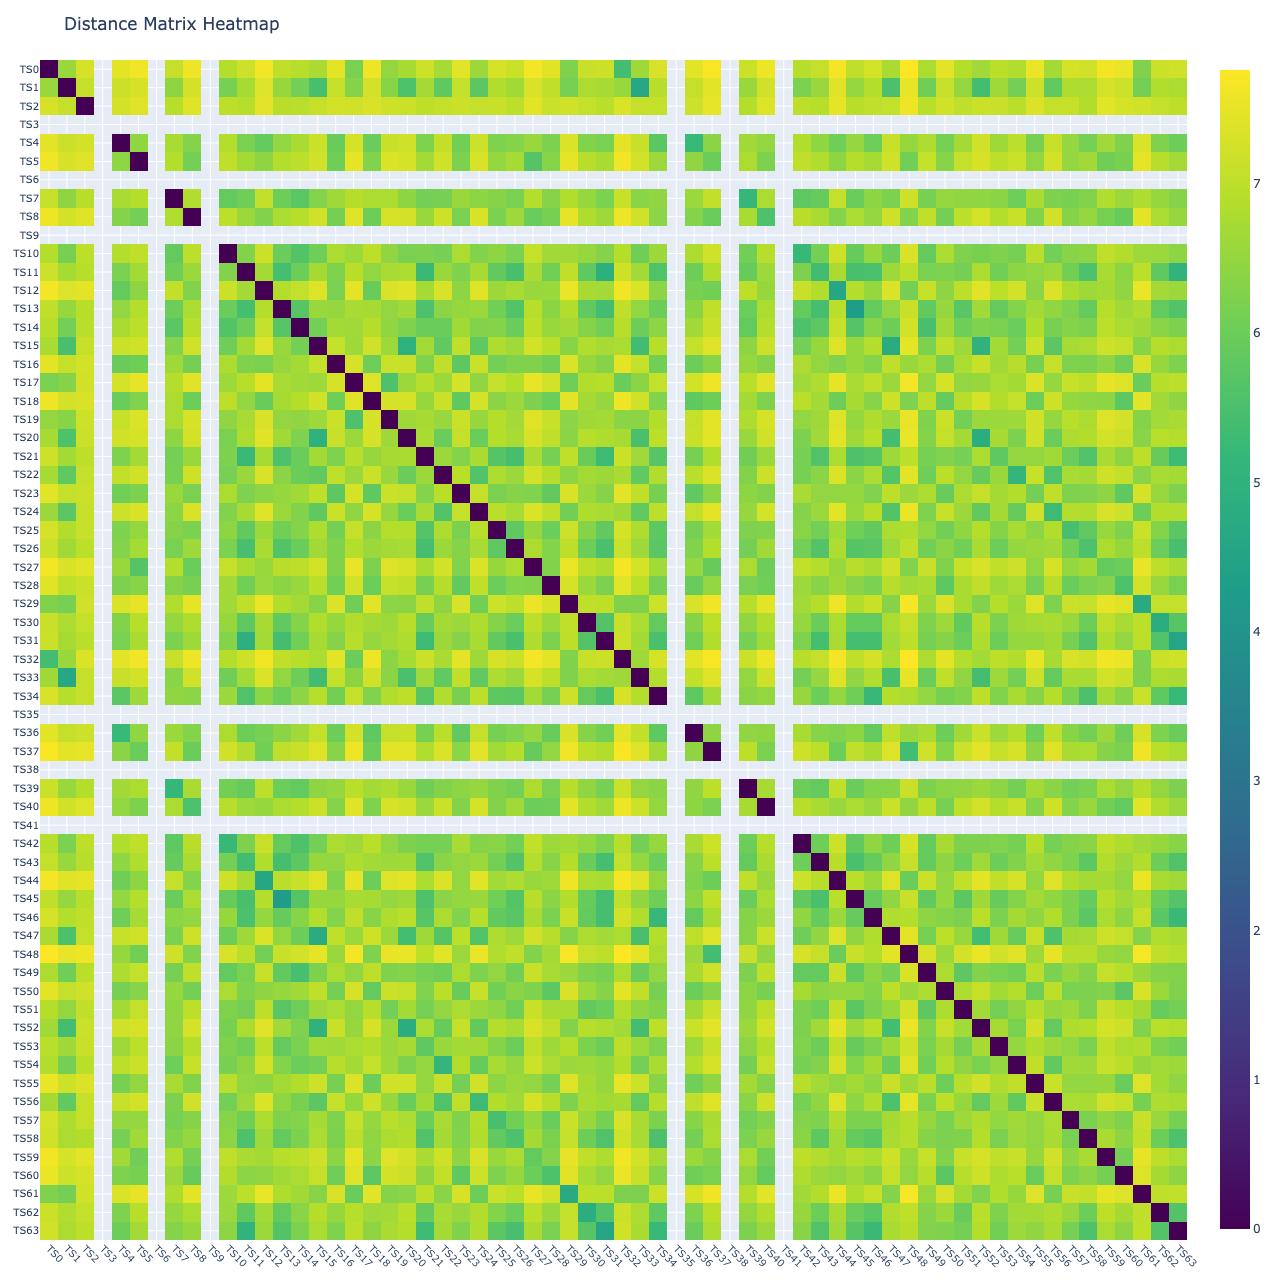

In [ ]:
#| eval: true
Xopera0 = np.stack([fftrio0.percentiles_face(fbands=[0], features=['p85'], factory=wfactories['db4']).features_tint[subj] for subj in fftrio0.percentiles_face(factory=wfactories['db4']).subjects])
Xopera1 = np.stack([fftrio1.percentiles_face(fbands=[0], features=['p85'], factory=wfactories['db4']).features_tint[subj] for subj in fftrio1.percentiles_face(factory=wfactories['db4']).subjects])
Xopera = np.concatenate([Xopera0, Xopera1])
plot_dm_heatmap(Xopera, alignment_type='fastdtw', gamma=1, normalize='log', n_jobs=8)  # 'dcor', 'fastdtw'(euclidean), 'tslearn_dtw'(euclidean), 'soft_dtw'(sqeuclidean), 'soft_dtw_div'

In [ ]:
#| hide
COLUMNS_FILTER=[
        'knn_precomputed', 
        'knn_cosine', 
        'knn_l1', 
        'knn_euclidean', 
        'knn_minkowski', 
        'rotf', 
        'randf', 
        'svm_precomputed', 
        'svm_rbf', 
        'svm_poly', 
        'svm_linear'
    ]

In [ ]:
#| hide
#| export
dg0 = Piece(time_interval=(14200, 14700), title='Don Giovanni', subjs=[(40,76)])
dg1 = Piece(time_interval=(14700, 15200), title='Don Giovanni', subjs=[(40,76)])

 [DEBUG] mixins.wrapper: wrapper of process_subjects called with subjs=[(40, 76)], args=() and kwargs={'time_interval': (14200, 14700), 'title': 'Don Giovanni'}
 [DEBUG] mixins.wrapper: Calling: get_piece_attribute_values with title=Don Giovanni and atributes=['number_of_subjects']
 [DEBUG] mixins.wrapper: to get subjects_int from 'number_of_subjects' record in performance_library
 [DEBUG] mixins.wrapper: Calling: __init__ with subjs=[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76] and args=() and kwargs={'time_interval': (14200, 14700), 'title': 'Don Giovanni'}
 [DEBUG] piece.__init__: Processed subjects: [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]
 [DEBUG] piece.__init__: Compact numeric subjects: [(40, 76)]
 [DEBUG] mixins.wrapper: wrapper of process_subjects called with subjs=[(40

In [ ]:
#| eval: false

Xopera0 = np.stack([dg0.percentiles_face(fbands=[1], features=['p85'], factory=wfactory('db4', level=8)).features_tint[subj] for subj in dg0.percentiles_face(factory=wfactory('db4', level=8)).subjects])
Xopera1 = np.stack([dg1.percentiles_face(fbands=[1], features=['p85'], factory=wfactory('db4', level=8)).features_tint[subj] for subj in dg1.percentiles_face(factory=wfactory('db4', level=8)).subjects])

 [DEBUG] mixins.wrapper: wrapper of process_subjects called with subjs=all, args=() and kwargs={}
 [DEBUG] mixins.wrapper: Using self.subjects_int: [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]
 [DEBUG] mixins.wrapper: Taking all subjects: [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]
 [DEBUG] mixins.wrapper: Calling: return_subjects with subjs=[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76] and args=() and kwargs={}
 [DEBUG] mixins.wrapper: Calling return_subjects with subjs=[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76] and args=() and kwargs={}
 [INFO] mixins.wrapper: Calling perce

In [ ]:
#| export

features=['p90']
clusters_subj_dg0, subj_clusters_dg0, labels_dg0, silhouette_dg0, centroids_dg0 = dtw_clustering(
    dg0.percentiles_face(fbands=[1,2], features=features, factory=wfactory('db4', level=8)),
    normalize=False, #'minmax',
    metric = "dtw",
    n_clusters=3,
    max_iter=10,
    random_state=0
)

 [DEBUG] mixins.wrapper: wrapper of process_subjects called with subjs=all, args=() and kwargs={}
 [DEBUG] mixins.wrapper: Using self.subjects_int: [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]
 [DEBUG] mixins.wrapper: Taking all subjects: [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]
 [DEBUG] mixins.wrapper: Calling: return_subjects with subjs=[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76] and args=() and kwargs={}
 [DEBUG] mixins.wrapper: Calling return_subjects with subjs=[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76] and args=() and kwargs={}
 [INFO] mixins.wrapper: Calling perce

 [INFO] piece._load_from_db: Loading roi_t from the database tcamera as user tanalyst
 [INFO] piece._fetch_from_DB: Fetching data by query SELECT subj40, subj41, subj42, subj43, subj44, subj45, subj46, subj47, subj48, subj49, subj50, subj51, subj52, subj53, subj54, subj55, subj56, subj57, subj58, subj59, subj60, subj61, subj62, subj63, subj64, subj65, subj66, subj67, subj68, subj69, subj70, subj71, subj72, subj73, subj74, subj75, subj76 FROM dg.faceposition_t WHERE frame_number >= 14200 AND frame_number < 14700 ORDER BY frame_number
 from the database  tcamera as user tanalyst
 [DEBUG] piece.start: SSH tunnel established
 [DEBUG] dbms.__enter__: Database connection opened: True (conn.closed=0)
 [DEBUG] dbms.__enter__: Database cursor opened: True
 [INFO] dbms.data_query: Fetching time series of ['subj40', 'subj41', 'subj42', 'subj43', 'subj44', 'subj45', 'subj46', 'subj47', 'subj48', 'subj49', 'subj50', 'subj51', 'subj52', 'subj53', 'subj54', 'subj55', 'subj56', 'subj57', 'subj58', 'su

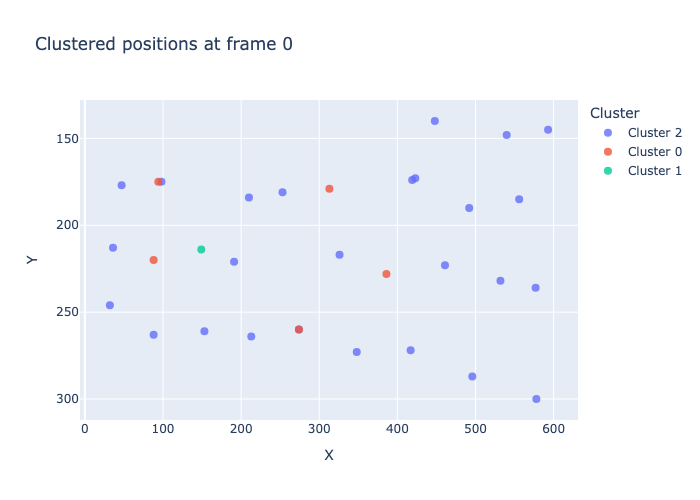

In [ ]:
#| eval: false

depict_clusters(clusters_subj_dg0, dg0.roi_t.position.features_tint)

In [ ]:
#| eval: false

Xopera0 = np.vstack([
    dg0.percentiles_face(
        fbands=[1], 
        features=['p90'], 
        factory=wfactory('db8', level=8)
    ).features_tint[subj] for subj in dg0.percentiles_face(
        factory=wfactory('db8', level=8), features=['p0']
    ).subjects
])
Xopera1 = np.vstack([
    dg1.percentiles_face(
        fbands=[1], 
        features=['p90'], 
        factory=wfactory('db8', level=8)
    ).features_tint[subj] for subj in dg1.percentiles_face(
        factory=wfactory('db8', level=8), features=['p0']
    ).subjects
])

 [DEBUG] mixins.wrapper: wrapper of process_subjects called with subjs=all, args=() and kwargs={}
 [DEBUG] mixins.wrapper: Using self.subjects_int: [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]
 [DEBUG] mixins.wrapper: Taking all subjects: [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]
 [DEBUG] mixins.wrapper: Calling: return_subjects with subjs=[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76] and args=() and kwargs={}
 [DEBUG] mixins.wrapper: Calling return_subjects with subjs=[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76] and args=() and kwargs={}
 [INFO] mixins.wrapper: Calling perce

In [ ]:
#| eval: false
RAND_STATE = 5

In [ ]:
#| eval: false

X, y = prepare_data(Xopera0, Xopera1)
Xopera_train, Xopera_te, yopera_train, yopera_te = split_scale_data(X, y, test_size=0.3, random_state=RAND_STATE, normalize=False)

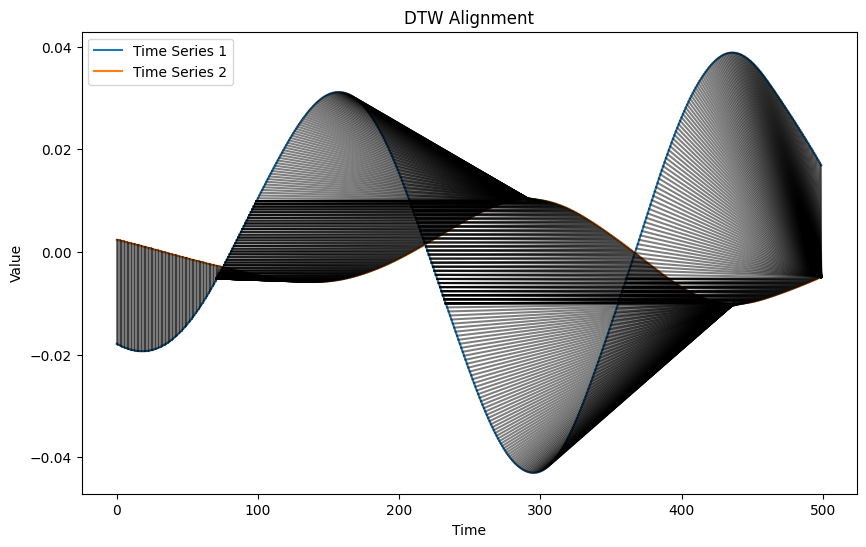

In [ ]:
#| eval: false

depict_DTW(Xopera_train[0], Xopera_train[30], dist=euclidean, radius=10)